In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Data//data//bikeData.txt")
df = pd.DataFrame(data)

In [6]:
pd.set_option('display.max_columns', None)

**Data Cleaning & Information for Data**

In [19]:
df['Month'] = df['Month'].astype('str')

In [72]:
df.drop('Seasons', axis = 1, inplace = True)

In [230]:
df.isna().sum()

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Seasons             0
Clean_Profit        0
dtype: int64

In [239]:
df['Customer_Age'].agg(['mean', 'std', 'sum'])

mean    3.591921e+01
std     1.102194e+01
sum     4.060164e+06
Name: Customer_Age, dtype: float64

In [232]:
df.shape

(113036, 19)

In [252]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Clean_Profit
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,372.681358
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674,595.080571
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,1.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,39.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,135.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,432.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,26158.000000


In [69]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

df['Seasons'] = df['Month'].apply(get_season)

$$
OR

In [73]:
df['Seasons'] = df['Month'].apply(lambda month : 'Winter' if month in ['December', 'January', 'February'] else 'Spring' if month in ['March', 'April', 'May'] else 'Summer' if month in ['June', 'July', 'August'] else 'Fall')

In [77]:
df['Customer_Gender'] = df['Customer_Gender'].replace('F', 'Female')

In [79]:
df['Customer_Gender'] = df['Customer_Gender'].replace('M', 'Male')

In [8]:
df.drop('Date', axis = 1, inplace = True)

In [95]:
df['Clean_Profit'] = (df['Unit_Price'] * df['Order_Quantity']) - (df['Unit_Cost'] * df['Order_Quantity'])

> Temporary DataFrames

In [306]:
def get_clean_Profit(df, category, year):
    return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Clean_Profit'].sum()

bikes_sum = []
clothing_sum = []
acc_sum = []

for x in range(2011, 2017):
    bikes_sum.append(get_clean_Profit(df,'Bikes', x))
    clothing_sum.append(get_clean_Profit(df, 'Clothing', x))
    acc_sum.append(get_clean_Profit(df,'Accessories', x))

In [307]:
def get_order(df, category, year):
        return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Order_Quantity'].sum()

bikes_sum_order = []
clothing_sum_order = []
acc_sum_order = []

for x in range(2011, 2017):
    bikes_sum_order.append(get_order(df,'Bikes', x))
    clothing_sum_order.append(get_order(df, 'Clothing', x))
    acc_sum_order.append(get_order(df,'Accessories', x))

In [298]:
years = [2011, 2012, 2013, 2014, 2015, 2016]

In [299]:
bikes_df = {
    'Year' : years,
    'Summary' : bikes_sum,
    'Order' : bikes_sum_order
}
bikes = pd.DataFrame(bikes_df)

In [303]:
clothing_df = {
    'Year' : years,
    'Summary' : clothing_sum,
    'Order' : clothing_sum_order
}
clothing = pd.DataFrame(clothing_df)

In [304]:
acc_df = {
    'Year' : years,
    'Summary' : acc_sum,
    'Order' : acc_sum_order
}
accessories = pd.DataFrame(acc_df)

*Visualization*

C:\Users\xrist\AppData\Local\Temp\ipykernel_17572\3098167515.py:20: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 70000, 5000)


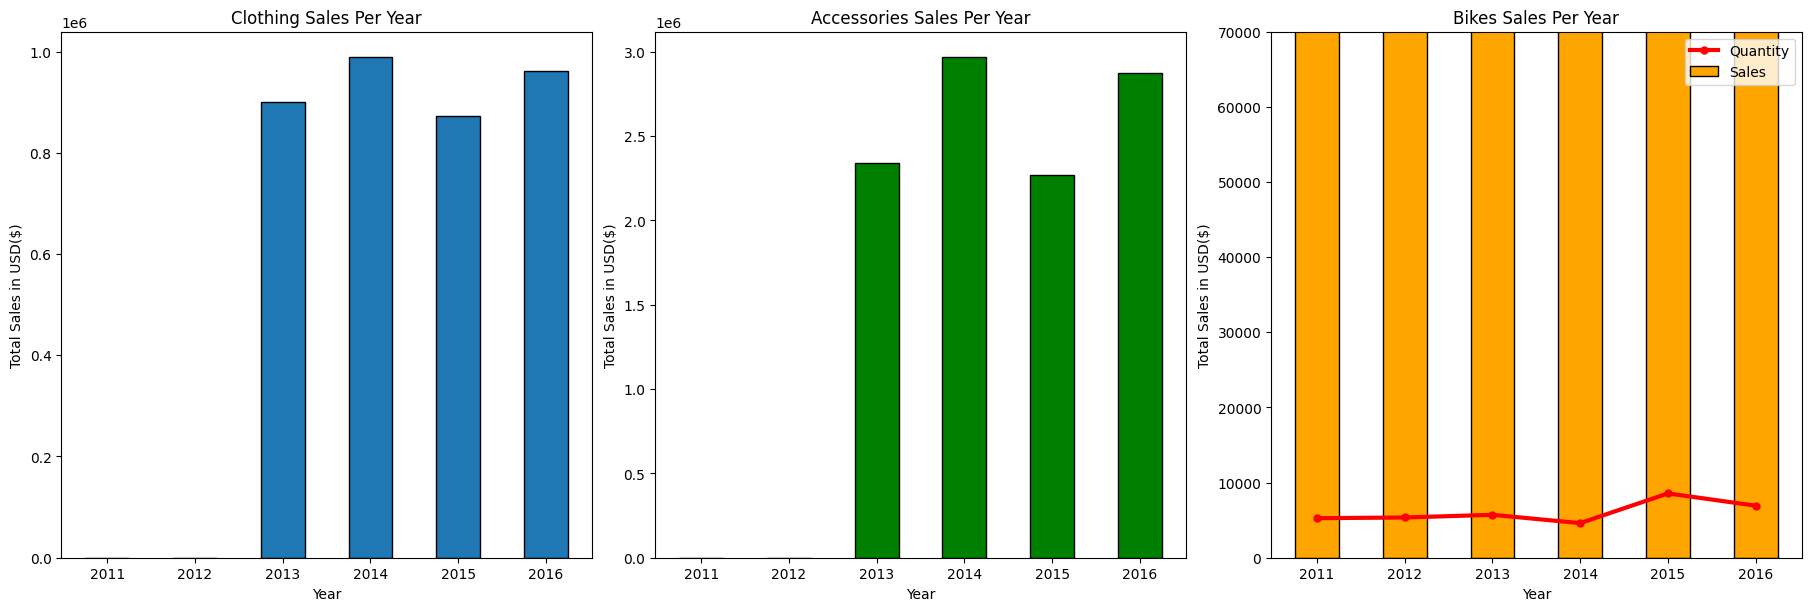

In [305]:
plt.figure(figsize = (18,6), facecolor = 'white', layout = 'constrained')

plt.subplot(131)
plt.bar(clothing['Year'], clothing['Summary'], width= 0.5, edgecolor = 'Black')
plt.xlabel('Year')
plt.ylabel('Total Sales in USD($)')
plt.title('Clothing Sales Per Year')

plt.subplot(132)
plt.bar(accessories['Year'], accessories['Summary'], width= 0.5, edgecolor = 'Black', color = 'green')
plt.xlabel('Year')
plt.ylabel('Total Sales in USD($)')
plt.title('Accessories Sales Per Year')

plt.subplot(133)
plt.bar(bikes['Year'], bikes['Summary'], width= 0.5, edgecolor = 'Black', color = 'orange', label = 'Sales')
plt.plot(bikes['Year'], bikes['Order'], linewidth = 3, marker = 'o', markersize = 5, label = 'Quantity', color = 'red')
plt.xlabel('Year')
plt.ylabel('Total Sales in USD($)')
plt.ylim(0, 70000, 5000)
plt.title('Bikes Sales Per Year')
plt.legend()

Text(0, 0.5, 'Total Order Quantity')

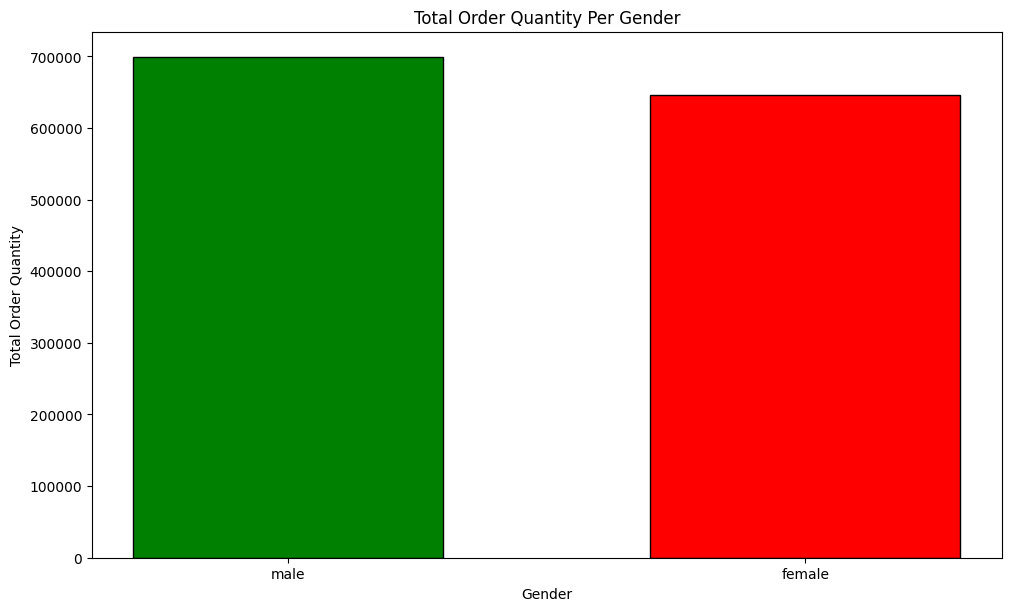

In [227]:
plt.figure(figsize = (10,6), layout = 'constrained')
plt.bar(['male', 'female'], [male_qua, female_qua], color = ['green', 'red'], edgecolor = 'Black', width = 0.6)

plt.title('Total Order Quantity Per Gender')
plt.xlabel('Gender')
plt.ylabel('Total Order Quantity')

In [247]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Seasons,Clean_Profit
0,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Fall,600
1,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Fall,600
2,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Spring,1725
3,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Spring,1500
4,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Spring,300


In [251]:
pivot_table = df.pivot_table(index = 'Year', columns = 'Product_Category',values = 'Order_Quantity', aggfunc = 'mean')
print(pivot_table)

Product_Category  Accessories     Bikes   Clothing
Year                                              
2011                      NaN  1.964886        NaN
2012                      NaN  2.000000        NaN
2013                15.383827  1.000000  15.624326
2014                15.155378  1.000000  14.991175
2015                14.964393  1.498424  15.135113
2016                14.701373  1.504561  14.571128
